# Projet numérique n°2 : Equations Différentielles

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.integrate
import math


# Equations de Lotka-Volterra

On considère le système suivant (LV) :

\begin{equation}
  \left\{
    \begin{split}
   \dot x_{1}  = x_{1} * (\alpha - \beta * x_{2}) \\ 
   \dot x_{2}  = - x_{2} * (\gamma - \delta * x_{1})\\
   \end{split}
  \right.
\end{equation}\
où x1 et x2 désignent le nombre (positif) de proies et de prédateurs respectivement et α, β, γ, δ sont des paramètres strictement positifs.

#### Question 1

Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre (0, 0) et x ̄ ∈ R>0 × R>0. Que peut-on dire de leur stabilité à ce stade ?


* Identification des termes

On effectue un bilan entre $t$ et $t+dt$ de la population des proies :

$x_{1}$($t+dt$) - $x_{1}$($t$) = (solde naturel - décès dus aux prédateurs) * $dt$\
soit\
$x_{1}(t+dt) - x_{1}(t)$ = - $x_{2}$ * (taux de reproduction - $x_{2}$ * taux de mortalité due aux prédateurs)* $dt$

D'où l'identification suivante : \
$\alpha$ = taux de reproduction naturel des proies et $\beta$ = taux de mortalité due aux prédateurs.


On effectue le même raisonnement pour la population des prédateurs : \
$x_{2}(t+dt) - x_{2}(t)$ = $x_{2}$ * (taux de mortalité naturelle - $x_{1}$ * taux de reproduction sur la population des prédateurs)* $dt$

On pondère le taux de reproduction des prédateurs par le nombre de proies car il dépend de la population des proies. En revanche, le taux de mortalité naturelle lui est indépendant du nombre de proies.
D'où l'identification suivante :

$\gamma$ = taux de mortalité naturelle des proies et $\delta$ = taux de natalité pondéré par le nombre de proies.

* Détermination des points d'équilibre

Soit $$
f : (x_1,x_2) \in \mathbb{R}^2 \mapsto ( x_{1} * (\alpha - \beta * x_{2}), - x_{2} * (\gamma - \delta * x_{1}))
$$
Déjà,  $$ f(0,0) = (0,0)$$
Ainsi (0,0) est un point d'équilibre.

Résolvons l'équation $$
\left\{
    \begin{split} f(x_{1},x_{2}) = (0,0) \\(x_{1},x_{2}) \neq(0,0) 
       \end{split}
  \right.
  $$

Remarquons que si $x_{1}$ ou $x_{2}$ est nul, alors le système n'admet pas de solution. On peut donc supposer $x_{1}$ et $x_{2}$ tous deux non nuls.

L'unique solution est alors $ \overline{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

* Stabilité de 0 et  $ \overline{x}$

$f$ est clairement continûment différentiable. Calculons la jacobienne de f en 0 et $ \overline{x}$.

Soit $x_{1},x_{2}$ deux réels positifs,
$$
J_{f}(x_{1},x_{2}) =  \begin{pmatrix} \alpha - \beta * x_{2} & - \beta * x_{1}*x_{2} \\ \gamma * x_{1}*x_{2}  & - \gamma + \delta * x_{1} \end{pmatrix} $$

Donc $$ J_{f}(0,0) =  \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma \\ \end{pmatrix} $$


Cette matrice est diagonale donc on lit ses valeurs propres sur la diagonale :
$ J_{f}(0,0)$ a au moins une valeur propre à partie réelle strictement positive, à savoir $\alpha$ donc le point d'équilibre 0 est instable.

De même,  $$ J_{f}(\overline{x}) =  \begin{pmatrix} 0 & - \frac{\gamma * \beta}{\delta} \\  \frac{\alpha * \delta}{\beta} & 0 \end{pmatrix} $$

Par un calcul de polynôme caractéristique, on trouve que $$ Sp( J_{f}(\overline{x})) = \{ \pm i* \sqrt{\alpha*\gamma} \} $$

On ne peut pas conclure sur la stabilité de ce point à ce stade de l'étude

#### Question 2
A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

In [139]:
a,b,d,g = 2/3,2/3,1,1
def f(x,t = 0):
    return np.array([x[0]*(a - b*x[1]), - x[1]*(g - d*x[0])])

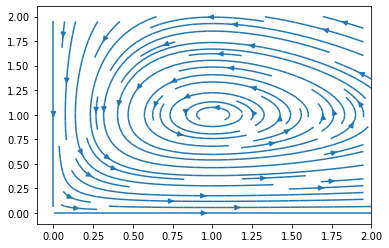

In [140]:
a, b = 2,2
x, y = np.linspace(0, a, 100), np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)
U = X*(a-Y*b)
V = - Y*(g-X*d)
plt.streamplot(X, Y, U, V)

Graphiquement, on observe que si la solution a été initialisé dans $R^2_{>0}$, alors celle-ci est bornée et décrit une sorte d'ovale. Cela pourrait caractériser une périodicité des solutions.
L'explication de ce comportement se trouve dans la modélisation du système étudié :
* Lorsqu'il y a énormément de prédateurs par rapport aux proies, la population des prédateurs diminue.
* Alors, la population des proies augmente démesurément jusqu'à le point où le nombre de proies est grand devant celui des prédateurs.
* Les prédateurs se reproduisent en mangeant les proies et ainsi de suite.

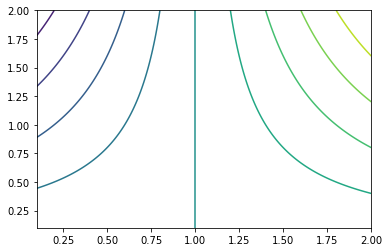

In [141]:

def Portrait_X():
    x, y = np.linspace(0.1, 2, 100), np.linspace(0.1, 2, 500)
    X, Y = np.meshgrid(x, y)
    Xp = f((X,Y),t=0)[0]
    plt.contour(X,Y,Xp,10)
    
def Portrait_Y():
    x, y = np.linspace(0.1, 2, 100), np.linspace(0.1, 2, 500)
    X, Y = np.meshgrid(x, y)
    Yp = f((X,Y),t=0)[1]
    plt.contour(X,Y,Yp,10)


Portrait_Y()


#### Question 3
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $R_{>0}^2$ reste dans $R_{>0}^2$ sur son ensemble de définition.


Soit $x = (x_{1},x_{2})$ une solution du système de Lotka-Volterra.
Soit $t_{0} > 0$ tel que $ \left\{ \begin{split} x_{1}(t_{0}) > 0 \\ x_{2}(t_{0}) > 0 \end{split} \right.$

* Supposons qu'il existe $t_{1} > 0$ tel que $x_{1}(t_{1}) = 0$
Alors la fonction y définie par : \
Pour tout t > 0, $$ y(t) = (0, x_{2}(t_{1})* \exp{(t - t_{1})}) $$ est aussi solution du même problème de Cauchy que x.
Or, par le théorème de Cauchy-Lipschitz, cette solution est unique, donc x n'a pas été initialisé dans R>0 × R>0. 


* Le cas où il existe $t_{1} > 0$ tel que $x_{2}(t_{1}) = 0$ se traite de la même façon.


On en déduit que toute solution initialisée dans $R_{>0}^2$ reste dans $R_{>0}^2$ sur son ensemble de définition.



#### Question 4
On considère la fonction
$$ H(x_{1},x_{2})=\delta * x_{1} −\gamma * \ln{x_{1}} +\beta * x_{2} − \alpha * \ln{x_{2}}$$
définie sur $R_{>0}^2$

* Calculons la dérivée de H par rapport au temps.

$$\frac{dH}{dt} = \delta * \dot x_{1} - \gamma * \frac{\dot x_{1}}{x_{1}}  + \beta * \dot x_{2} - \alpha * \frac{\dot x_{2}}{x_{2}}$$

Donc $$  \frac{dH}{dt} = \delta *  x_{1} * (\alpha - \beta * x_{2}) - \gamma * (\alpha - \beta * x_{2}) + \beta * (- x_{2}) * (\gamma - \delta * x_{1}) - \alpha * - (\gamma - \delta * x_{1}) = 0$$

H est constante le long des solutions initialisées dans $R_{>0}^2$
On note $H_{0}$ cette constante

Supposons que $\| x(t)\|$ -> + $\infty$ lorsque $t -> + \infty$, alors soit $x_{1}$, soit $x_{2}$ diverge vers +$\infty$ en + $\infty$. 
* On se place dans le cas où $x_{1}$ diverge en +$\infty$.  
Une rapide étude de fonction permet de dire que $\beta * x_{2} − \alpha * \ln{x_{2}} >= \alpha*(1-\ln{\frac{\alpha}{\beta}})$. \
Comme  $\delta * x_{1} −\gamma * \ln{x_{1}}$ -> +$\infty$ en +$\infty$, on aurait alors $H(x_{1},x_{2}) -> +\infty$ lorsque t -> +$\infty$. \
Contradiction ! 
* Le cas où $x_{2}$ diverge se traite de la même manière.

Ainsi, $\| x(t)\|$ est bornée : d'après le théorème de Domaine maximal d'existence, la solution maximale est définie sur $R_{+}$ tout entier.




#### Question 5
Représenter les courbes de niveau de H . Où se trouve $\overline{x}$ ? Qu’en conclut-on sur le comportement des solutions ? En déduire (graphiquement) que $\overline{x}$ est stable, au sens de la définition de stabilité.


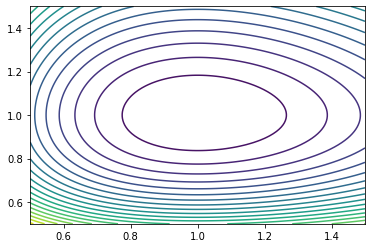

In [142]:
def H(x1,x2,t = 0):
    return d*x1 - g*np.log(x1) + b*x2 - a*np.log(x2)

def afficher_H():
    x, y = np.linspace(0.5, 1.5, 100), np.linspace(0.5, 1.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = H(X,Y)
    plt.contour(X,Y,Z,20)

afficher_H()
#Ou cf dernier projet

$\overline{x}$  se trouve au centre de la figure ($\overline{x} = (1,1)$). Les courbes de niveau forment des cercles donc les solutions sont bornées. Si l'on se déplace d'epsilon, alors on retombe sur une courbe de niveau arbitrairement proche de $\overline{x}$. Ainsi, les solutions restent arbitrairement proche de $\overline{x}$ quand elles sont initialisées suffisamment proche de $\overline{x}$, donc $\overline{x}$ est stable au sens de la définition de stabilité.

#### Question 6


Considérons l'équation différentielle suivante :\
($E_{1}$): $x'(t) = t*x(t)$

In [143]:
def f1(x,t):
    return t*x



In [144]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    t = np.arange(t0,tf,dt)
    X = [x0]
    xi = x0
    for i in range(1,len(t)):
        xi = xi +  dt*f(xi,t[i])
        X.append(xi)
    return t,X

#Exemples à mettre

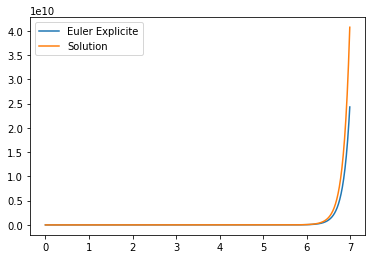

In [145]:
T,X=solve_euler_explicit(f1,np.array([1.0]),0.01,0,7)
t = np.arange(0,7,0.01)
X_R = np.exp((t**2)/2)
plt.plot(T,X,label = "Euler Explicite")
plt.plot(T,X_R,label = "Solution")
plt.legend()

Pour des temps se rapprochant de 0, soit lorsque $dt$ tend vers 0, on obtient des solutions satisfaisantes. Le schéma converge lorsque $dt$ tend vers 0.

Considérons l'équation différentielle suivante :\
($E_{2}$): $x''(t) = - x(t)$

In [146]:
def oscillateur(x,t):
    return np.array([x[1],-x[0]])
T,X_E=solve_euler_explicit(oscillateur,np.array([1,1],dtype = 'float64'),0.1,0,7)
X_E0 = [X_E[i][0] for i in range(0,len(X_E))]
t = np.arange(0,7,0.1)
X_R = scipy.integrate.odeint(oscillateur,np.array([1,1],dtype = 'float64'),t )
X_R0 = [X_R[i][0] for i in range(0,len(X_R))]

In [147]:
T,X_E=solve_euler_explicit(oscillateur,np.array([1,1],dtype = 'float64'),0.1,0,14)
X_E0 = [X_E[i][0] for i in range(0,len(X_E))]
t = np.arange(0,14,0.1)
X_R = scipy.integrate.odeint(oscillateur,np.array([1,1],dtype = 'float64'),t )
X_R0 = [X_R[i][0] for i in range(0,len(X_R))]

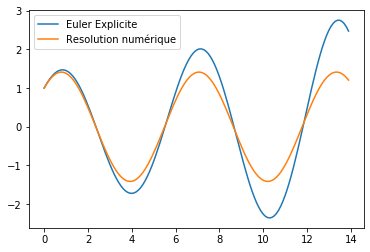

In [148]:
plt.plot(t,X_E0,label ="Euler Explicite" )
plt.plot(t,X_R0,label = "Resolution numérique")
plt.legend()

Pour voir l'ordre de consistance du schéma graphiquement, on peut observer l'écart entre la courbe de la solution théorique et la solution donnée par le schéma utilisé.
Ici on remarque que pour des temps longs, les erreurs s'accumulent, ce qui est caractéristique du schéma d'Euler.

#### Question 7 :  Utilisation du schéma d'Euler sur (LV)

On applique Euler Explicite aux équations de Lotka Volterra :

In [149]:
T,X_E=solve_euler_explicit(f,np.array([0.2,1],dtype = 'float64'),0.01,0,14)
t = np.arange(0,14,0.01)
X_R = scipy.integrate.odeint(f,np.array([0.2,1],dtype = 'float64'),t )
X_R0 = [X_R[i][0] for i in range(0,len(X_R))]
X_E0 = [X_E[i][0] for i in range(0,len(X_E))]
X_R1 = [X_R[i][1] for i in range(0,len(X_R))]
X_E1 = [X_E[i][1] for i in range(0,len(X_E))]

Text(0, 0.5, 'Population des proies')

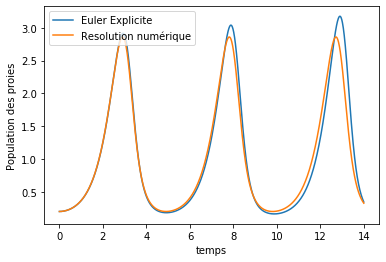

In [150]:
plt.plot(t,X_E0,label = "Euler Explicite")
plt.plot(t,X_R0,label = "Resolution numérique")
plt.legend()
plt.xlabel("temps")
plt.ylabel("Population des proies")

Text(0, 0.5, 'Population des prédateurs')

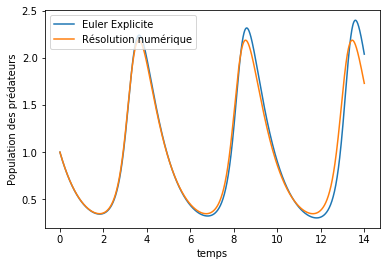

In [151]:
plt.plot(t,X_E1,label = "Euler Explicite")
plt.plot(t,X_R1, label = "Résolution numérique")
plt.legend()
plt.xlabel("temps")
plt.ylabel("Population des prédateurs")

Sur un temps long :

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


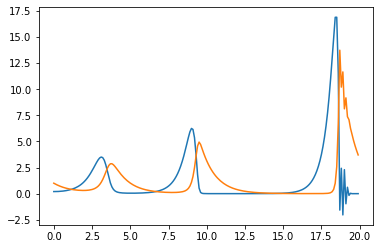

In [152]:
T,X_E=solve_euler_explicit(f,np.array([0.2,1],dtype = 'float64'),0.1,0,20)
plt.plot(T,X_E)
res = [H(X_E[i][0],X_E[i][1]) for i in range(0,len(X_E))]

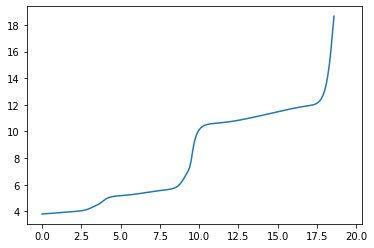

In [153]:
plt.plot(T,res)

Pour des temps longs, on remarque que le schéma perd de sa consitance pour même produire un résultat erroné. Ce n'est pas étonnant puisque cette méthode d'Euler est explicite et l'approximation devient réellement fausse lorsque le pas de temps augmente.

On remarque aussi que $H$ n'est pas constante, alors que l'on a montré que cette quantité devait se conserver.
Cette résolution ne nous semble pas fidèle à la réalité.

#### Question 8


In [154]:
def solve_euler_implicit(f,x0,dt,t0,tf,itermax = 100):
    t = np.arange(t0,tf,dt)
    x = [x0]
    xi = x0
    for i in range(1,len(t)):
        def ge(y):
            return (y - xi - dt*f(y,t[i]))
        xi = scipy.optimize.newton(ge,xi,maxiter = itermax)
        x.append(xi)
    return t,x

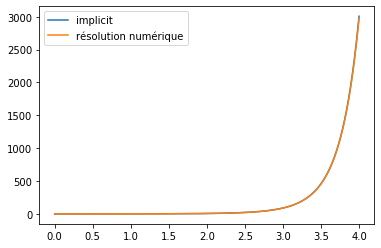

In [155]:
def f1(x,t):
    return t*x

T,X=solve_euler_implicit(f1,1,0.001,0,4)
plt.plot(T,X,label = "implicit")  

Xv=np.exp((T**2)/2) 
plt.plot(T,Xv,label = "résolution numérique")
plt.legend()

In [156]:
T,X_E=solve_euler_implicit(oscillateur,np.array([1,1],dtype = 'float64'),0.01,0,14)
X_E0 = [X_E[i][0] for i in range(0,len(X_E))]
t = np.arange(0,14,0.01)
X_R = scipy.integrate.odeint(oscillateur,np.array([1,1],dtype = 'float64'),t )
X_R0 = [X_R[i][0] for i in range(0,len(X_R))]

Text(0, 0.5, 'Position')

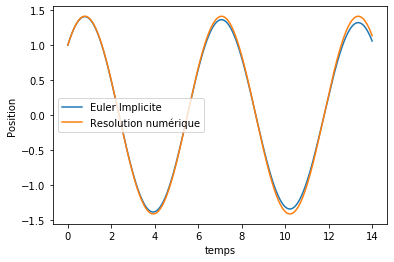

In [157]:
plt.plot(t,X_E0,label = "Euler Implicite")
plt.plot(t,X_R0,label = "Resolution numérique")
plt.legend()
plt.xlabel("temps")
plt.ylabel("Position")


La superposition entre le résultat attendu et la solution donnée par Euler Implicite est satisfaisante pour valider la convergence du schéma.

Text(0, 0.5, 'Population des proies')

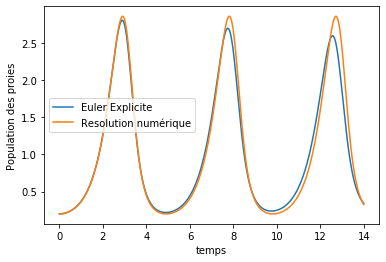

In [158]:
T,X_E=solve_euler_implicit(f,np.array([0.2,1],dtype = 'float64'),0.01,0,14)
t = np.arange(0,14,0.01)
X_R = scipy.integrate.odeint(f,np.array([0.2,1],dtype = 'float64'),t )
X_R0 = [X_R[i][0] for i in range(0,len(X_R))]
X_E0 = [X_E[i][0] for i in range(0,len(X_E))]
plt.plot(t,X_E0,label = "Euler Explicite")
plt.plot(t,X_R0,label = "Resolution numérique")
plt.legend()
plt.xlabel("temps")
plt.ylabel("Population des proies")

Pour les équations de Lotka Volterra, on remarque que la différence entre les graphes de la solution numérique de la bibliothèque scipy.integrate et d'Euler implicite est moins marquée qu'avec Euler explicite.
Néanmoins, les erreurs s'amplifient à mesure que le temps avance. Cela s'explique par l'accumulation d'erreurs à chaque instant t, caractéristique des schémas de type Euler.

#### Question 9 

Soit $x$ une solution des équations de Lotka Volterra (LV). 

Alors, quel que soit t : $H(x(t)) = H_{0}$

$x$ vérifie donc les équations de Lotka Volterra modifiées (LVm) :

$\dot x_{1} = x_{1}*(\alpha − β*x_{2}) − u_{1}(x_{1}, x_{2})*(H(x_{1}, x_{2}) − H_{0})$

$\dot x_{2} = −x_{2}*(γ − δ*x_{1}) − u_{2}(x_{1}, x_{2})*(H(x_{1}, x_{2}) − H_{0})$

puisque ce sont alors les équations de Lotka Volterra.
Les solutions de LV sont des solutions de LVm.

Réciproquement, soit $x$ une solution des équations LVm.
On peut écrire : 
$\dot x(t)$=$g$(x,t) 
où $g$ est une fonction continûment différentiable.

D'après le théorème de Cauchy-Lipschitz, il existe une unique solution maximale aux équations LVm sur R qui vérifie $x(0)=x_{0}$.

Or, si $z$ est la solution des équations de LV qui vérifie $z(0)=x_{0}$, $z$ est donc la solution des équations de LVm qui vérifie $z(0)=x_{0}$.
Donc $x$=$z$. Donc $z$ est solution de LV.

Les solutions de LVm sont donc des solutions de LV.

Il y a donc équivalence entre être solution du système de Lotka Volterra et être solution du système modifié.

#### Question 10

Soit $H_{0}$ $\in R$. Calculons $\frac{d(H(x(t) - H_{0})}{dt}$

\begin{equation}
\frac{d(H(x(t) - H_{0})}{dt} =   \delta * \dot x_{1} - \gamma * \frac{\dot x_{1}}{x_{1}}  + \beta * \dot x_{2} - \alpha * \frac{\dot x_{2}}{x_{2}} \\
= \delta *  x_{1} * (\alpha - \beta * x_{2}) - \gamma * (\alpha - \beta * x_{2}) + \beta * (- x_{2}) * (\gamma - \delta * x_{1}) - \alpha * - (\gamma - \delta * x_{1}) + (u_{1} * (\frac{\gamma}{x_{1}} - \delta) + u_{2} * (\frac{\alpha}{x_{2}} - \beta)) * (H-H_{0})
\end{equation} 
Qui se simplifie en :
\begin{equation}
\frac{d(H(x(t) - H_{0})}{dt} = (u_{1} * (\frac{\gamma}{x_{1}} - \delta) + u_{2} * (\frac{\alpha}{x_{2}} - \beta)) * (H-H_{0})
\end{equation}

On calcule $\nabla{H(x(t))}$ :
\begin{equation}
\nabla{H(x(t))} = \begin{pmatrix} \delta - \frac{\gamma}{x_{1}} \\ \beta - \frac{\alpha}{x_{2}} \end{pmatrix} \end{equation}
Il suffit de prendre $u$ : x $\in R^2_{>0}$ -> $(- k * (\delta - \frac{\gamma}{x_{1}}),-k * (\beta - \frac{\alpha}{x_{2}}))$

On a alors : 
$ \frac{d}{dt}(H(x(t)) - H_{0}) = - k*\| \nabla{H(x(t))}\|^2 * (H(x(t)) - H_{0}) $. \
Supposons que x reste à un distance strictement positive de $\overline{x}$.
Alors $\| \nabla{H(x(t))}\|^2$ > 0 donc il existe $\lambda > 0$ tel que $\| \nabla{H(x(t))}\|^2$ > $\lambda$

Il vient : $ \frac{d}{dt}(H(x(t)) - H_{0}) \leq - k* \lambda * (H(x(t)) - H_{0}) $

Posons $u = H - H_{0}$. Soit $t_{0}$ tel que $u(t_{0}) \neq 0$
Par positivité de l'intégrale, on obtient l'inégalité suivante : \
$\forall t > t_{0} \,\\ u(t) \leq u(t_{0}) - k*\lambda * \int_{t_{0}}^{t} u(s) \mathrm{d}s \$

En appliquant le lemme de Gronwall à u, on montre que  : 
$\forall t > t_{0}\, \\ u(t) \leq H(t_{0}) * \exp(\int_{t_{0}}^{t} (-k*\lambda) \mathrm{d}s ) = \exp(-k*\lambda*(t-t_{0}))$

Donc $H(x(t))$ converge exponentiellement vers $H_{0}$ lorsque t tend vers l'infini et x reste à une distance strictement positive de $\overline{x}$.

#### Question 11 : Modification du schéma Euler Implicite.

In [172]:
def solve_euler_implicit_modified(f,x0,dt,t0,tf,k = 1,itermax = 100):
    H0 = H(x0[0],x0[1])
    def f_modified(x,t = 0):
        return np.array([x[0]*(a - b*x[1]) - k*(d-(g/x[0]))*(H(x[0],x[1])-H0), \
                         - x[1]*(g - d*x[0])- k * (b - (a/x[1]))*(H(x[0],x[1])-H0)])
    t = np.arange(t0,tf,dt)
    x = [x0]
    xi = x0
    for i in range(1,len(t)):
        def ge(y):
            return (y - xi - dt*f_modified(y,t[i]))
        xi = scipy.optimize.newton(ge,xi,maxiter = itermax)
        x.append(xi)
    return t,x

Text(0, 0.5, 'Population des proies')

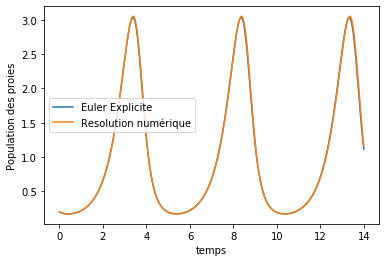

In [174]:
T,X_E=solve_euler_implicit_modified(f,np.array([0.2,1.4],dtype = 'float64'),0.01,0,14,k = 0,12)
X_R = scipy.integrate.odeint(f,np.array([0.2,1.4],dtype = 'float64'),T )
X_R0 = [X_R[i][0] for i in range(0,len(X_R))]
X_E0 = [X_E[i][0] for i in range(0,len(X_E))]
plt.plot(T,X_E0,label = "Euler Explicite")
plt.plot(T,X_R0,label = "Resolution numérique")
plt.legend()
plt.xlabel("temps")
plt.ylabel("Population des proies")

Le résultat est très satisfaisant par rapport aux anciennes simulations.

$k$ représente l'inverse d'un temps et caractèrise la vitesse à laquelle $H$ converge vers $H_{0}$. On aimerait choisir k excessivement grand, pour avoir une convergence exponentielle très rapide, cependant, on peut penser que k dépend du pas de temps $dt$. 
\
Pour cela, calculons $$
H(x_{j+1}) - H(x_{0})$$

$$
H(x_{j+1}) - H(x_{0}) =H(x_{j}) - H(x_{0}) + \int_{t_{j}}^{t_{j+1}} -  k*\| \nabla{H(x(t_{j}))}\|^2 * (H(x(t_{j})) - H_{0})\mathrm{d}s \
= (H(x_{j}) - H(x_{0}))( 1 - k*dt*\| \nabla{H(x(t_{j}))}\|^2)
$$

On se rend compte qu'on ne peut pas mettre k aussi grand que l'on veut. Lorsque $ k > 1/(dt*\| \nabla{H(x(t_{j}))}\|^2)$ le schéma diverge.
Donc on doit avoir $k < 1/(dt*\| \nabla{H(x(t_{j}))}\|^2)$